<center><img src="imagen/ML.jpg" width="900" height="50"></center>


# Supervised Machine Learning en Predicción de Diabetes


> Realizar análisis de datos

> Utilice diferentes algoritmos para predecir la etiqueta de destino

> Muestre la precisión de 4 algoritmos diferentes con la ayuda de gráficos

Los principales problemas que debe resolver esta tarea de ciencia de datos se han enmarcado adecuadamente, en términos de los objetivos del cliente, la información de fondo y el propósito del problema. Esto asegura que la tarea sea comprendida y explorada para informar mejor el proceso de toma de decisiones sobre la posible gama de enfoques y soluciones a los problemas.

Este problema extraerá datos de estudios de caso relevantes, representativos y suficientes de una fuente en línea confiable y de buena reputación. Se realizarán los ajustes adecuados de preprocesamiento y la exploración de datos en los datos para garantizar resultados y productos confiables y razonables. Para el proceso de modelado y minería de datos, se ajustarán, analizarán y evaluarán los populares modelos clasificadores de árbol de decisión, Naive bayes, KNN y red neuronal de perceptrón multicapa en términos de métricas de rendimiento de exactitud, precisión, recuperación y puntuación F1 en predecir las clasificaciones de la diabetes. Todas las interpretaciones y observaciones importantes serán tomadas en cuenta y consideradas para futuras mejoras.

Siguiendo el propósito de este estudio, el enfoque principal estará en los factores relacionados con la diabetes, que son una variedad de medidas de salud que incluyen 'Embarazos', 'Glucosa', 'Presión sanguínea', 'Grosor de la piel', 'Insulina', 'IMC', 'DiabetesPedigreeFunction' y 'Edad' como predictores. Analizarlos ayudará a identificar áreas de preocupación y evaluar y predecir el resultado de la diabetes.


In [2]:
# Manipulacion y tratamiento de datos
import pandas as pd
import numpy as np

# visualización de datos
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

# Conjunto de datos

El primer paso de una tarea de ciencia de datos es obtener, recopilar y medir los datos necesarios y específicos de las fuentes de datos internas o externas disponibles, y luego compilarlos en un sistema establecido.

In [3]:
# import data from Excel csv sheet
df = pd.read_csv("data/diabetes_data.csv")

# show first 5 records of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# devolver el tipo de objeto, que es marco de datos
type(df)

pandas.core.frame.DataFrame

El tipo de formato de marco de datos facilitará el uso de una variedad más amplia de sintaxis y métodos para el análisis de datos, incluidos `describe ()` e `info ()`.

Con respecto a los atributos incluidos en el conjunto de datos de predicción de la diabetes, hay 8 predictores de diabetes diferentes, registrados como 'Embarazos', 'Glucosa', 'Presión sanguínea', 'Grosor de la piel', 'Insulina', 'BMI', 'DiabetesPedigreeFunction' y 'Edad' . La etiqueta de la clase de destino es 'resultado', donde **0 representa ausencia y 1 representa presencia**. Dado que los datos están etiquetados, se utilizarán métodos de aprendizaje automático supervisados para modelar los datos más adelante.

# Procesamiento de Datos

El preprocesamiento de datos es una técnica de minería de datos que transforma los datos sin procesar en un formato comprensible. Este proceso tiene cuatro etapas principales: limpieza de datos, integración de datos, transformación de datos y reducción de datos.

La limpieza de datos filtrará, detectará y manejará datos sucios para garantizar datos de calidad y resultados de análisis de calidad. En este caso, puede haber ruidos de valores extremos e imposibles, valores atípicos y valores perdidos. Los errores pueden incluir datos inconsistentes y atributos y datos redundantes.

Como primer paso, se identificarán los valores nulos dentro del conjunto de datos y se reemplazarán adecuadamente si es posible.

In [4]:
# mostrar el número de entradas, el número y los nombres de los atributos de la columna, el tipo de datos y
# ubicaciones de dígitos y el espacio de memoria utilizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


El conjunto de datos contiene 768 filas de registros y 9 columnas de atributos. Los tipos de datos de los atributos consisten en 1 binario discreto cuantitativo, 6 enteros numéricos discretos cuantitativos y 2 números flotantes cuantitativos continuos con posiciones de 64 dígitos.

El uso de espacio de memoria es de al menos 54,1 kilobytes (KB).

A través de esto, se encuentra que no hay valores nulos presentes en el conjunto de datos.

A continuación, se verifican los ruidos de valores imposibles analizando los valores máximo y mínimo utilizando diagramas de caja y estadísticas de resumen.

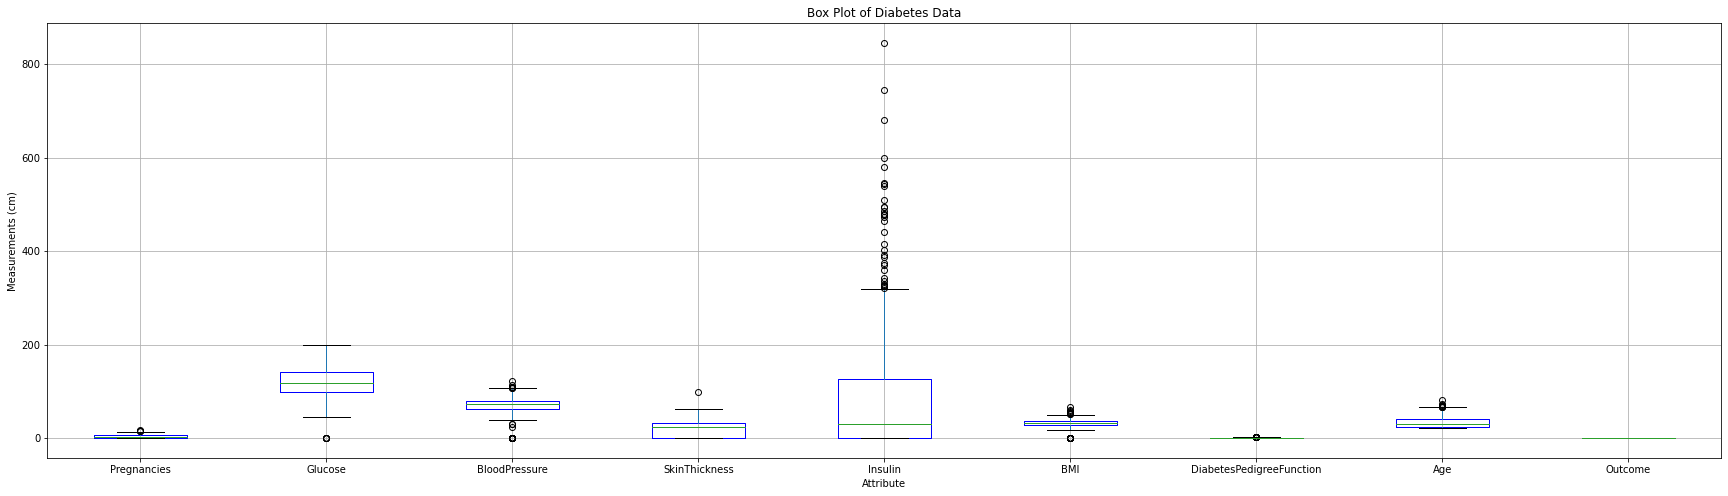

In [5]:
# identificar valores imposibles y valores atípicos usando diagramas de caja
df.boxplot(rot = 0, boxprops = dict(color = 'blue'), return_type = 'axes', figsize = (30, 8))
plt.title("Box Plot of Diabetes Data") # title of plot
plt.suptitle("")
plt.xlabel("Attribute") # x axis label
plt.ylabel("Measurements (cm)") # y axis label
plt.show()

In [6]:
# estadísticas resumidas de los atributos, incluidas medidas de tendencia central y
# medidas de dispersión
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* **Pregnancies:** es el número de embarazos hasta la fecha, con un rango realista de 0 a 17.
* **Glocose:** Ésta es la concentración de glucosa en plasma durante 2 horas en una prueba de tolerancia a la glucosa oral, medida en miligramos por decilitro (mg / dL). Un nivel de azúcar en sangre inferior a 140 mg / dL es normal. Una lectura de más de 200 mg / dL indica diabetes, mientras que entre 140 y 199 mg / dL (indica prediabetes. Los datos van de 0 a 199, lo que indica que el valor imposible de 0 debe suavizarse.
* **BloodPressure:** es la presión arterial diastólica, medida en milímetros de mercurio (mm Hg). Una presión arterial normal tendría una lectura de menos de 80 mmHg, y esto puede variar de 90 a 120 mmHg para una persona joven sana. Una lectura de más de 140 mmHg indica presión arterial alta. Los datos van de 0 a 122, lo que indica que el valor imposible de 0 debe suavizarse.
* **SkinThickness:** es el grosor del pliegue cutáneo del tríceps, medido en milímetros (mm). Los datos van de 0 a 99, lo que indica que el valor imposible de 0 debe suavizarse.
* **Insulin:** es la insulina sérica de 2 horas, medida en unidades micrométricas por mililitro (mu U / ml). Los datos van de 0 a 846, lo que indica que el valor imposible de 0 debe suavizarse.
* **BMI:** es el índice de masa corporal (IMC) para el peso en kg y la altura en m (kg / m ^ 2). Los datos van de 0 a 67, lo que indica que el valor imposible de 0 debe suavizarse. El IMC no debe ser cercano a cero a menos que la persona tenga un peso muy bajo, lo que podría poner en peligro su vida.
* **DiabetesPedigreeFunction:** es una función que puntúa la probabilidad de diabetes según los antecedentes familiares, con un rango realista de 0,08 a 2,42.
* **Age:** en años tiene un rango realista de 21 a 81.
* **Outcome:** es la etiqueta de la clase de destino, donde 0 representa ausencia y 1 representa la presencia de diabetes.

Todos los valores imposibles se suavizarán reemplazándolos con el valor medio.

In [4]:
# suavizar valores imposibles reemplazando el valor con el valor medio
df['Glucose'] = df['Glucose'].replace(0, df.Glucose.mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df.BloodPressure.mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df.SkinThickness.mean())
df['Insulin'] = df['Insulin'].replace(0, df.Insulin.mean())
df['BMI'] = df['BMI'].replace(0, df.BMI.mean())

Los valores máximo y mínimo se comprueban para garantizar que se hayan suavizado todos los ruidos de valores imposibles.

In [9]:
# confirmar valores imposibles suavizados
# estadísticas resumidas de los atributos, incluidas medidas de tendencia central y
# medidas de dispersión
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A través de esto, se comprueba que no existen otros ruidos de valores imposibles.

El método de Winsorización se elige popularmente para manejar valores atípicos numéricos, donde los valores atípicos se reemplazan con el valor no atípico mínimo o máximo identificado mediante el método de rango intercuartílico (IQR). El rango de valor aceptable para no ser considerado un valor atípico es [Q1-1.5IQR, Q3 + 1.5IQR], donde Q1 es el primer cuartil del percentil 25, Q3 es el tercer cuartil del percentil 75 y IQR es (Q3 - Q1) .

Además, los valores numéricos imposibles y extremos pueden asumirse como entradas de datos incorrectas, cuando se identifican como diferentes del valor medio del atributo por un margen comparativamente grande.

En este caso, no se consideraron valores atípicos o imposibles y extremos, ya que todos los valores numéricos son razonables y están dentro de un rango esperado en relación con la ausencia de la Predicción de Diabetes o el presente estudio de caso.

En este caso, las filas o registros duplicados no se eliminarán del conjunto de datos. No existe cierta redundancia que cause resultados y resultados inexactos, ya que el conjunto de datos no tiene un identificador único que denote entidades separadas. A pesar de esto, el conjunto de datos aún se revisará en busca de filas duplicadas.

In [10]:
# detectar registros duplicados
df[df.duplicated(subset = None, keep = False)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


No hay duplicaciones en el conjunto de datos.

La integración de datos no es necesaria, ya que solo se usa un conjunto de datos sin integraciones de esquemas y, por lo tanto, no hay problemas de identificación de entidades discernibles o conflictos de valor de datos.

La transformación de datos verificará el rango general de valores para todo el conjunto de datos. Todos los valores deben caer dentro de un rango pequeño aceptable para permitir visualizaciones y modelado fáciles. Se encuentra que todos los valores ya caen por debajo de un rango aceptable de [0, 846], por lo que no es necesario transformar los datos para escalar los valores en un rango comparable para facilitar la visualización y el modelado.

La reducción de datos puede implicar la eliminación de atributos redundantes mediante la reducción de la dimensionalidad de los atributos. Sin embargo, hasta el momento no se han detectado casos relacionados.

Se utiliza un mapa de calor de correlación para enumerar todos los coeficientes de correlación con el fin de identificar la multicolinealidad, en otras palabras, una alta intercorrelación por encima de un valor absoluto de 0,5 entre un par de atributos. Para un par de atributos con multicolinealidad, uno de ellos se eliminará, ya que sería reductor incluir ambos con valores casi reflejados y, por lo tanto, descripciones casi perfectas entre sí. Otra razón es evitar el sobreajuste.

La correlación comparará y describirá la conexión lineal y la relación entre pares de características, a través del tipo de correlación y su fuerza. Una correlación positiva indica que ambas características cambiarán sus valores en la misma dirección, mientras que una correlación negativa indica que ambas cambiarán en direcciones opuestas. Cuanto mayor sea la fuerza de la correlación, más fuerte será la conexión y la relación.

Sin embargo, los modelos de árbol de decisión, k-vecinos más cercanos e ingenuo Bayes se eligen como modelos de clasificación más apropiados y todos son inmunes a la multicolinealidad. Los dos primeros son modelos no paramétricos: el árbol de decisiones solo examina una de las características a la vez durante el proceso de división, mientras que KNN examina las características en su totalidad. Naïve Bayes asume que todas las características son condicionalmente independientes. Por estas razones, los únicos predictores que se considerarán descartados serán si sus intercorrelaciones están por encima de 0,95 y, por lo tanto, son descripciones casi perfectas entre sí. Sería redundante incluirlos a ambos. Por lo tanto, no se eliminaron atributos para no perder información relevante y degradar el modelo general de predicción de aprendizaje automático supervisado.

El diagrama de pares o la matriz de diagrama de dispersión se utilizan para identificar y eliminar atributos con una relación de clase-atributo débil. Esto es de mayor utilidad e interés para fines de clasificación. Los diagramas de dispersión en el triángulo superior visualizarán las relaciones entre dos variables. Los gráficos de estimación de densidad de kernel (KDE), que se analizarán con más detalle en la siguiente sección, ilustrarán la distribución univariante de una sola variable en relación con la variable objetivo. Los gráficos de densidad de kernel 2-D en el triángulo inferior ilustrarán la densidad de una sola variable en relación con la variable de destino.

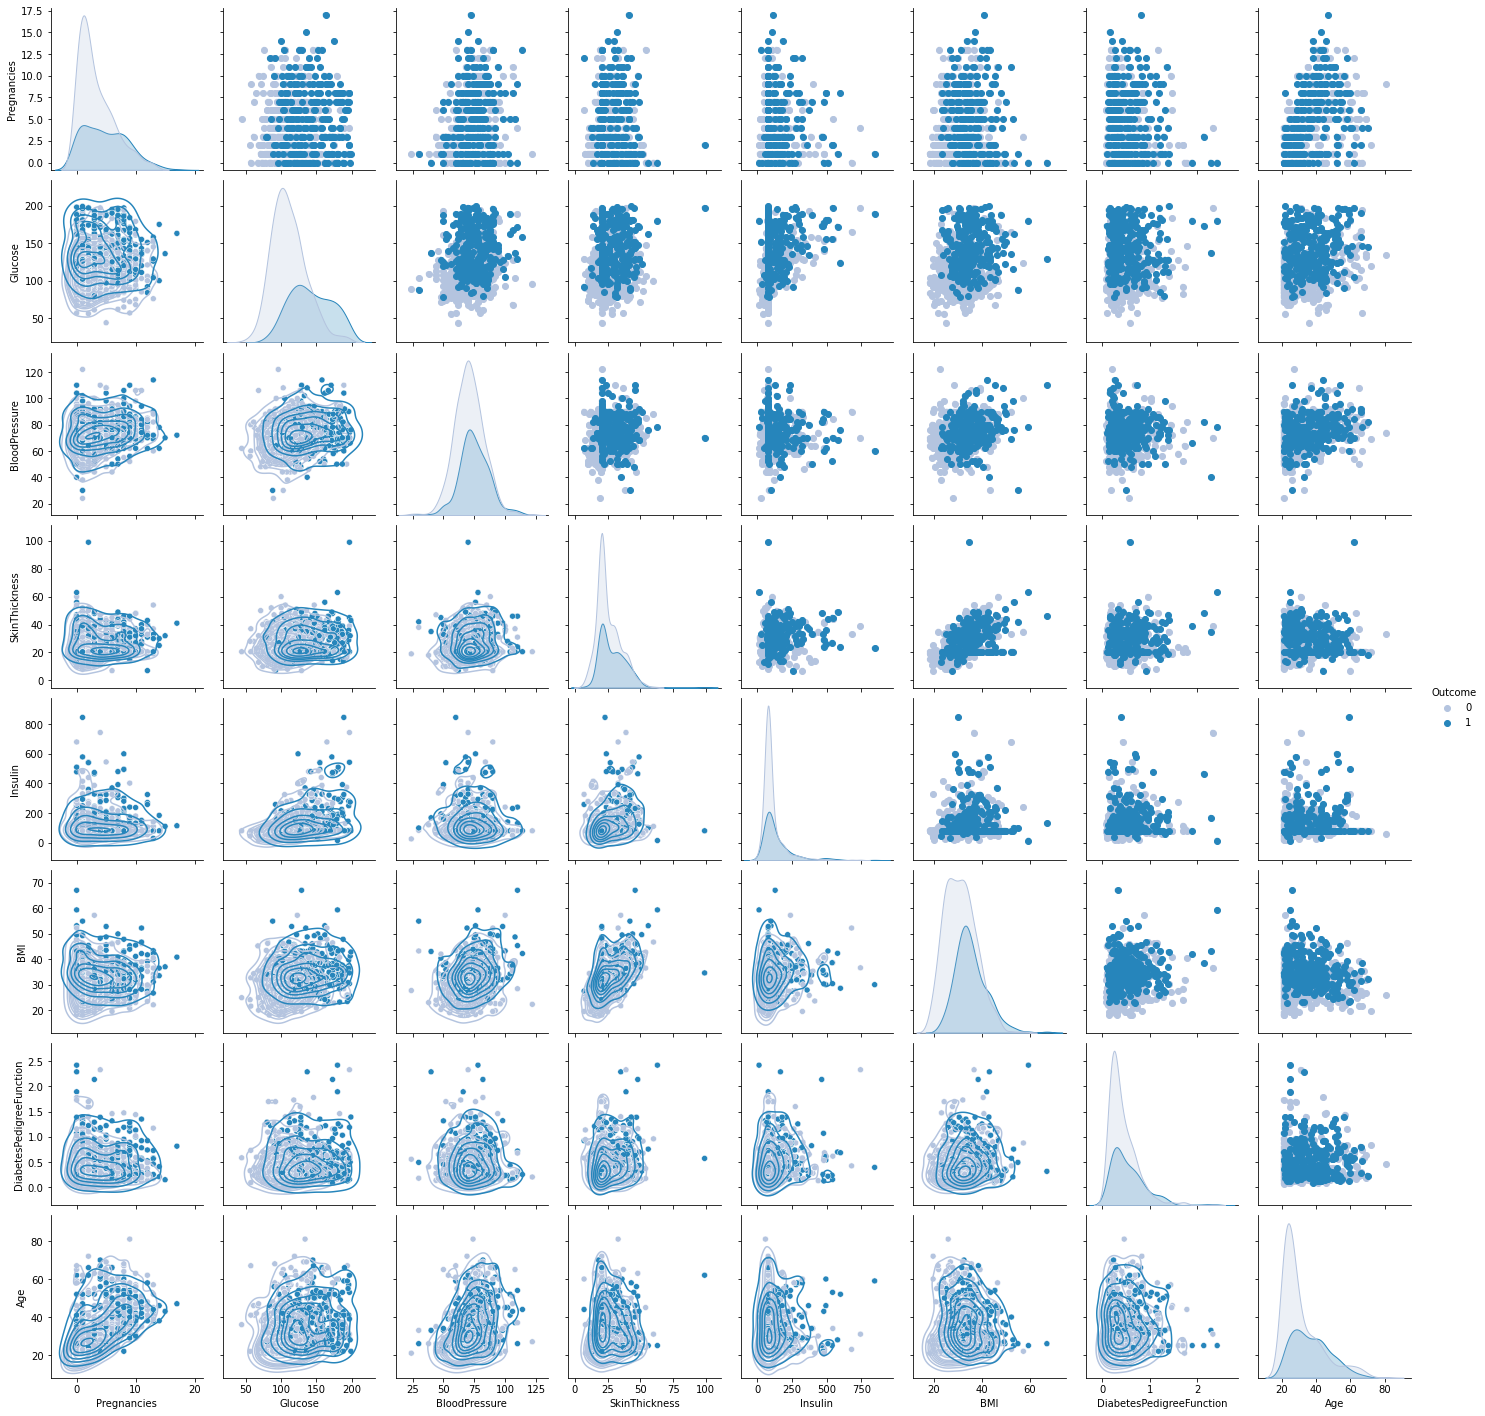

In [10]:
import seaborn as sns 

# visualise pairs plot or scatterplot matrix in relation to diabetes outcome
g = sns.pairplot(df, hue = 'Outcome', palette = 'PuBu')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

Todos ellos fueron analizados y se encontró que todas las características tienen una relación clase-atributo aceptablemente clara con límites de clase relativamente distinguibles, así como un grado aceptable de superposición o superposición de áreas. Por lo tanto, no se eliminó ningún atributo, ya que todos pueden permitir predicciones relativamente precisas para fines de clasificación.

La información final del conjunto de datos se resume a continuación.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


El conjunto de datos contiene 768 filas de registros y 9 columnas de atributos. Los tipos de datos de los atributos consisten en 1 binario discreto cuantitativo, 6 enteros numéricos discretos cuantitativos y 2 números flotantes cuantitativos continuos con posiciones de 64 dígitos.

El uso de espacio de memoria es de al menos 54,1 kilobytes (KB).

# Análisis exploratorio de datos (EDA)

EDA tiene como objetivo realizar investigaciones iniciales sobre los datos antes del modelado formal y las representaciones gráficas y visualizaciones, con el fin de descubrir patrones, revisar supuestos y probar hipótesis. La información resumida sobre las características principales y las tendencias ocultas en los datos puede ayudar al médico a identificar áreas de preocupación y problemas, y la resolución de estos puede aumentar su precisión en el diagnóstico de la diabetes.

Echando un vistazo más de cerca a las etiquetas de la clase de destino, así como su frecuencia de aparición:

In [12]:
# enumerar y contar los nombres de etiquetas de clase de destino y su frecuencia
from collections import Counter
count = Counter(df['Outcome'])
count.items()

dict_items([(1, 268), (0, 500)])

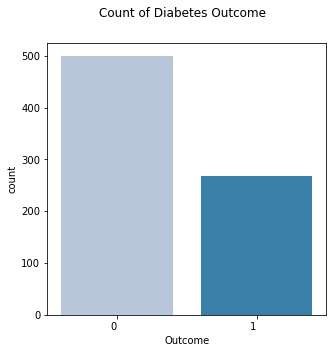

In [13]:
# recuento de cada etiqueta de clase objetivo
plt.figure(figsize = (5, 5))
ax = sns.countplot(df['Outcome'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, ha = "right")
plt.suptitle("Count of Diabetes Outcome")
plt.show()

Hay dos clases de resultados de diabetes con valores de datos binarios discretos cuantitativos, donde 1 tiene 268 instancias y 0 tiene 500. Esto ilustra claramente que los datos disponibles para la clase objetivo de 1 son aproximadamente la mitad de la proporción que la de 0, que será tomado nota para posteriores visualizaciones y análisis de datos.

Pasando a analizar los atributos cuantitativos de los predictores de diabetes, sus relaciones lineales y sus fortalezas se pueden comparar utilizando un mapa de calor de correlación.

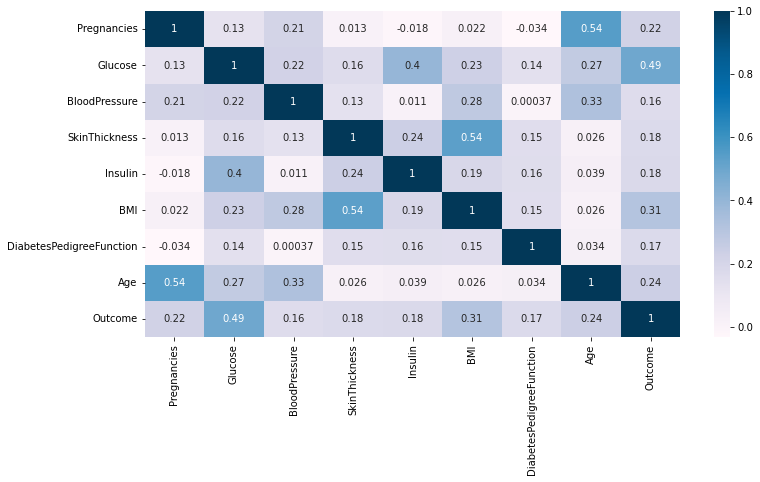

In [15]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

Casi todos los predictores tienen correlaciones lineales débiles, lo que indica que la mayoría tiene más probabilidades de tener relaciones no lineales. En particular, cuando la glucosa y el IMC aumentan en 1 unidad cada uno, el resultado positivo de la diabetes aumenta en 0,49 unidades y 0,31 unidades, respectivamente. Por lo tanto, se aconseja a la población que reduzca la ingesta de glucosa y las lecturas de IMC para minimizar las posibilidades de diabetes.

Hasta ahora, el análisis se centra principalmente en la relación entre las diversas características de la diabetes y la característica objetivo que es el resultado de la diabetes. Esto se debe a que el propósito de la clasificación estará principalmente interesado en estos tipos de correlación y sus fortalezas, a fin de obtener predicciones precisas.

La biblioteca de gráficos `matplotlib.pyplot` se importa para la visualización de figuras. Es conveniente ya que tiene buena reproducibilidad de figuras científicas, por ejemplo al regenerar una figura usando datos actualizados, apariencia, etiquetas y textos de látex, y aspectos como la orientación. % matplotlib inline se utiliza para configurar la salida de las figuras para que se incrusten en el archivo del cuaderno de Jupyter, en lugar de abrir una nueva ventana cada vez.

Toda la visualización de datos incluye gráficos adecuados que son descriptivos y comparativos para comunicar de manera efectiva ideas tanto abstractas como concretas.

Previamente, se trazó un diagrama de pares o una matriz de diagrama de dispersión. Los gráficos de densidad de histograma se eligen para ilustrar la distribución general de datos, así como las distribuciones de datos del resultado de la diabetes en función de las características del predictor. Los gráficos de estimación de densidad de kernel (KDE) visualizarán la distribución general a través de una curva de densidad de probabilidad continua. Se generan dos gráficos de densidad de histograma y sus curvas de densidad de probabilidad continua para los dos valores de características de destino en el mismo espacio de figura, y los diferencia claramente especificando diferentes códigos de color RGB hexadecimales en sus parámetros. El rango de la gráfica está limitado a 0 y más para visualizaciones significativas, ya que es imposible que las características del predictor tengan un valor negativo.

Todas las curvas de distribución generales de KDE tienen curtosis leptocúrtica positiva y asimetría correcta o positiva, ya que las instancias de datos disponibles para la clase 0 son aproximadamente el doble que las de 1. Los atributos AL1 excepto 'BloodPressure' tienen distribución de datos bimodal o multimodelo, ya que hay dos picos también conocidos como máximos locales. La 'presión sanguínea' tiene una distribución de datos normal aproximada ya que las curvas son aproximadamente simétricas, unimodales, asintóticas y su media, mediana y moda son similares.

Las gráficas de densidad del histograma y su respectivo punto más alto en las curvas muestran los patrones de que los pacientes con diabetes generalmente tienen un mayor número de embarazos, lecturas de glucosa e IMC más altas y mayor edad.

La diferencia en las gráficas de densidad del histograma superpuestas o superpuestas muestra claramente que la clase objetivo de características fuertemente correlacionadas se puede predecir más fácilmente y se puede extraer un significado más útil. Sus puntos de datos están menos dispersos y, por lo tanto, tienen menos áreas superpuestas o superpuestas, lo que significa que siguen mejor su respectiva relación o patrón común. Por lo tanto, se puede ver que la clasificación de correlación con el resultado de la diabetes, en orden decreciente, es 'Glucosa', 'Edad', 'Embarazos', 'IMC', 'DiabetesPedigreeFunction', 'BloodPressure', 'SkinThickness' e 'Insulin '. La 'glucosa' es, por tanto, el mejor predictor del resultado de la diabetes en este caso.

Por último, se considerarán las estadísticas resumidas.

In [16]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


`describe ()` se utiliza para obtener estadísticas resumidas que incluyen medidas de tendencia central, como la media y la mediana, y medidas de dispersión, como la desviación estándar, que son útiles para proporcionar una descripción rápida y sencilla del conjunto de datos y sus características.

# Modelacion de los Datos

El conjunto de datos se divide en dos conjuntos separados: el conjunto de entrenamiento y el conjunto de prueba. Ambos constan de los mismos atributos, pero no de los mismos valores de atributo. El conjunto de entrenamiento se utiliza para entrenar y construir los modelos de clasificación. El conjunto de prueba se utiliza para predecir las clasificaciones de los nuevos datos no sesgados que no se utilizaron para entrenar el modelo, antes de evaluar el rendimiento del modelo en función de las métricas de rendimiento de precisión, precisión, recuperación y puntuación F1 de esas clasificaciones.

Las etiquetas de destino tienen una distribución desigual. Para garantizar que los conjuntos de entrenamiento y prueba sean insesgados y representativos de las dos clases, se utiliza la lista de números aleatorios a partir de la posición seleccionada al azar de 987 para realizar la división aleatoria. Se traza un gráfico de precisión para encontrar la proporción de conjunto de entrenamiento más precisa, después de tomar en consideración las puntuaciones del modelo de árbol de decisión (DT), Naive Bayes (NB) y KNN.

In [5]:
# clasificar y modelar los datos utilizando k-Vecino más cercano (KNN), Árbol de decisión (DT) y Naive Bayes (NB)
# algoritmos de aprendizaje automático

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import math

df['Outcome'] = df.Outcome.astype(str)
df['Outcome'] = df.Outcome.astype(object)

# dividir el conjunto de datos en atributos y etiquetas
X = df.iloc[:, :-1].values # the attributes
y = df.iloc[:, 8].values # the labels



In [18]:
# elegir el rango apropiado de proporciones del conjunto de entrenamiento
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

In [19]:
# diagrama de árbol de decisión basado en la ganancia de información
DT = DecisionTreeClassifier(splitter = 'best', criterion = 'entropy', min_samples_leaf = 2)

# use el método gaussiano para admitir valores de datos continuos
NB = GaussianNB()

# elija el número óptimo recomendado de grupos de sqrt (número de registros)
KNN = KNeighborsClassifier(n_neighbors = math.ceil(math.sqrt(768)))



In [ ]:
# encontrar la mejor proporción del conjunto de entrenamiento para los modelos elegidos
plt.figure(figsize=(12,6))
#plt.figure()
for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s, random_state = 987)
        DT.fit(X_train, y_train) # consider DT scores
        scores.append(DT.score(X_test, y_test))
        NB.fit(X_train, y_train) # consider NB scores
        scores.append(NB.score(X_test, y_test))
        KNN.fit(X_train, y_train) # consider KNN scores
        scores.append(KNN.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
plt.xlabel('Training Set Proportion') # x axis label
plt.ylabel('Accuracy'); # y axis label

Según el gráfico, el subconjunto de entrenamiento debería ocupar el 80% del conjunto de datos, que son 119 instancias, mientras que el subconjunto de prueba ocupará el 20%, que son 30 instancias. Los modelos de aprendizaje automático de DT, NB,  KNN y MLP ahora se ajustan al conjunto de datos de entrenamiento.

Para el modelo KNN, el valor óptimo de k número de vecinos más cercanos se encuentra trazando una gráfica de precisión.

In [6]:
# elija divisiones de prueba de tren del conjunto de datos original como 80% de datos de tren 
#y 20% de datos de prueba para obtener la mayor precisión
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=987)

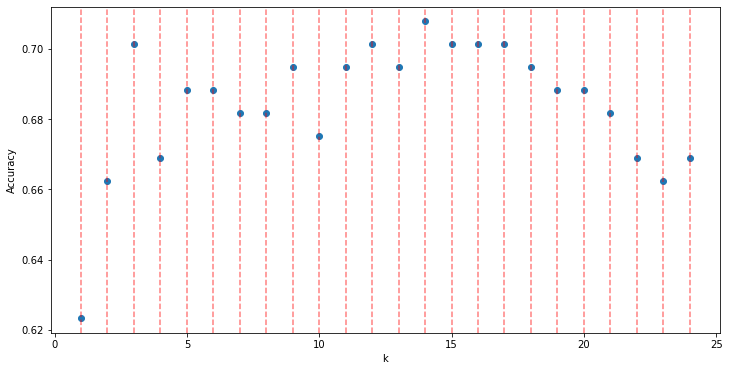

In [46]:


# encontrar el número k óptimo de grupos
k_range = range(1, 25)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

    
#plt.figure()
plt.figure(figsize=(12,6))
plt.xlabel('k') # x axis label
plt.ylabel('Accuracy') # y axis label
plt.scatter(k_range, scores) # scatter plot
for k in k_range:
    plt.axvline(k, linestyle='--', color='red', alpha=0.5)
plt.xticks([0, 5, 10, 15, 20, 25]);

In [26]:
# número de registros en el conjunto de entrenamiento
len(X_train)

614

El subconjunto de entrenamiento ocupa 614 instancias, mientras que el subconjunto de prueba ocupa las 154 instancias restantes.

In [27]:
# contar cada resultado en el conjunto de entrenamiento
count = Counter(y_train)
print(count.items())

dict_items([('0', 408), ('1', 206)])


La etiqueta de la clase de destino también tendrá una distribución desigual, donde 0 tiene 408 instancias y 1 tiene 206.

El gráfico de precisión identifica el valor óptimo de $k$ como 14 para obtener una precisión levemente superior al 70%, la más alta posible para este conjunto de datos. Esto se hace para obtener un valor de k que sea lo suficientemente grande como para minimizar la tasa de error y la sensibilidad al ruido, pero no demasiado grande como para que los límites se suavicen en exceso o se ajusten en exceso con puntos de las otras clases. El valor k elegido también es apropiado ya que 15 no es un múltiplo de las 2 clases, lo cual es un requisito al seleccionar el valor k. Los parámetros del modelo KNN son, por lo tanto, el valor de k de 15 y la métrica de distancia euclidiana para calcular la distancia entre puntos de datos. El resultado es la pertenencia a la clase asignada en función del voto mayoritario sobre el número k de vecinos del punto de datos.

## **k-Nearest Neighbour (KNN)**

In [7]:
# usando el clasificador k-Nearest Neighbor (KNN)
# elija 7 como el número óptimo de grupos
classifierKNN = KNeighborsClassifier(n_neighbors = 14)

# Entrenar el modelo 
classifierKNN.fit(X_train, y_train)

# utilizando la métrica de distancia euclidiana
classifierKNN.effective_metric_

'euclidean'

## **Gaussian Naïve Bayes**
**Gaussian Naïve Bayes** es adecuado para tipos de datos continuos, y las probabilidades previas y las verosimilitudes se calculan para predecir la probabilidad posterior de un punto de datos perteneciente a cada una de las tres clases. Las salidas son las probabilidades posteriores mencionadas anteriormente, y la pertenencia a la clase asignada se selecciona como la clase con la probabilidad posterior más alta.

In [8]:
# utilizando el clasificador Naive Bayes (NB)
classifierNB = GaussianNB()

# Entrenamos nuestro modelo
classifierNB.fit(X_train, y_train)

# mostrar probabilidad previa de cada clase
classifierNB.class_prior_

array([0.66449511, 0.33550489])

La clase a priori indica la probabilidad de que una observación pertenezca a una clase específica si no se proporcionó información. La probabilidad de predicción es 66,45% como 0 y solo 33,55% como 1.


## **Decision Tree (DT)**
El árbol de decisión se construye en función de los parámetros de la mejor estrategia de división y el criterio de entropía que utiliza la ganancia de información para seleccionar iterativamente el siguiente nodo de acuerdo con la importancia de la característica más alta para optimizar la calidad de las divisiones. El número mínimo de hojas está restringido a 2. Los resultados son las reglas de clasificación extraídas del árbol de decisiones. Estos están determinados por la secuencia de flujo desde el nodo raíz y las ramas correspondientes a los nodos internos o de decisión, y luego se detienen cuando se alcanza el nodo hoja que representa la etiqueta de clase.

In [9]:
# usando el clasificador Árbol de decisión (DT)
classifierDT = DecisionTreeClassifier(splitter = 'best', criterion='entropy', min_samples_leaf = 2)

# Entrenamos nuestro modelo
classifierDT.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

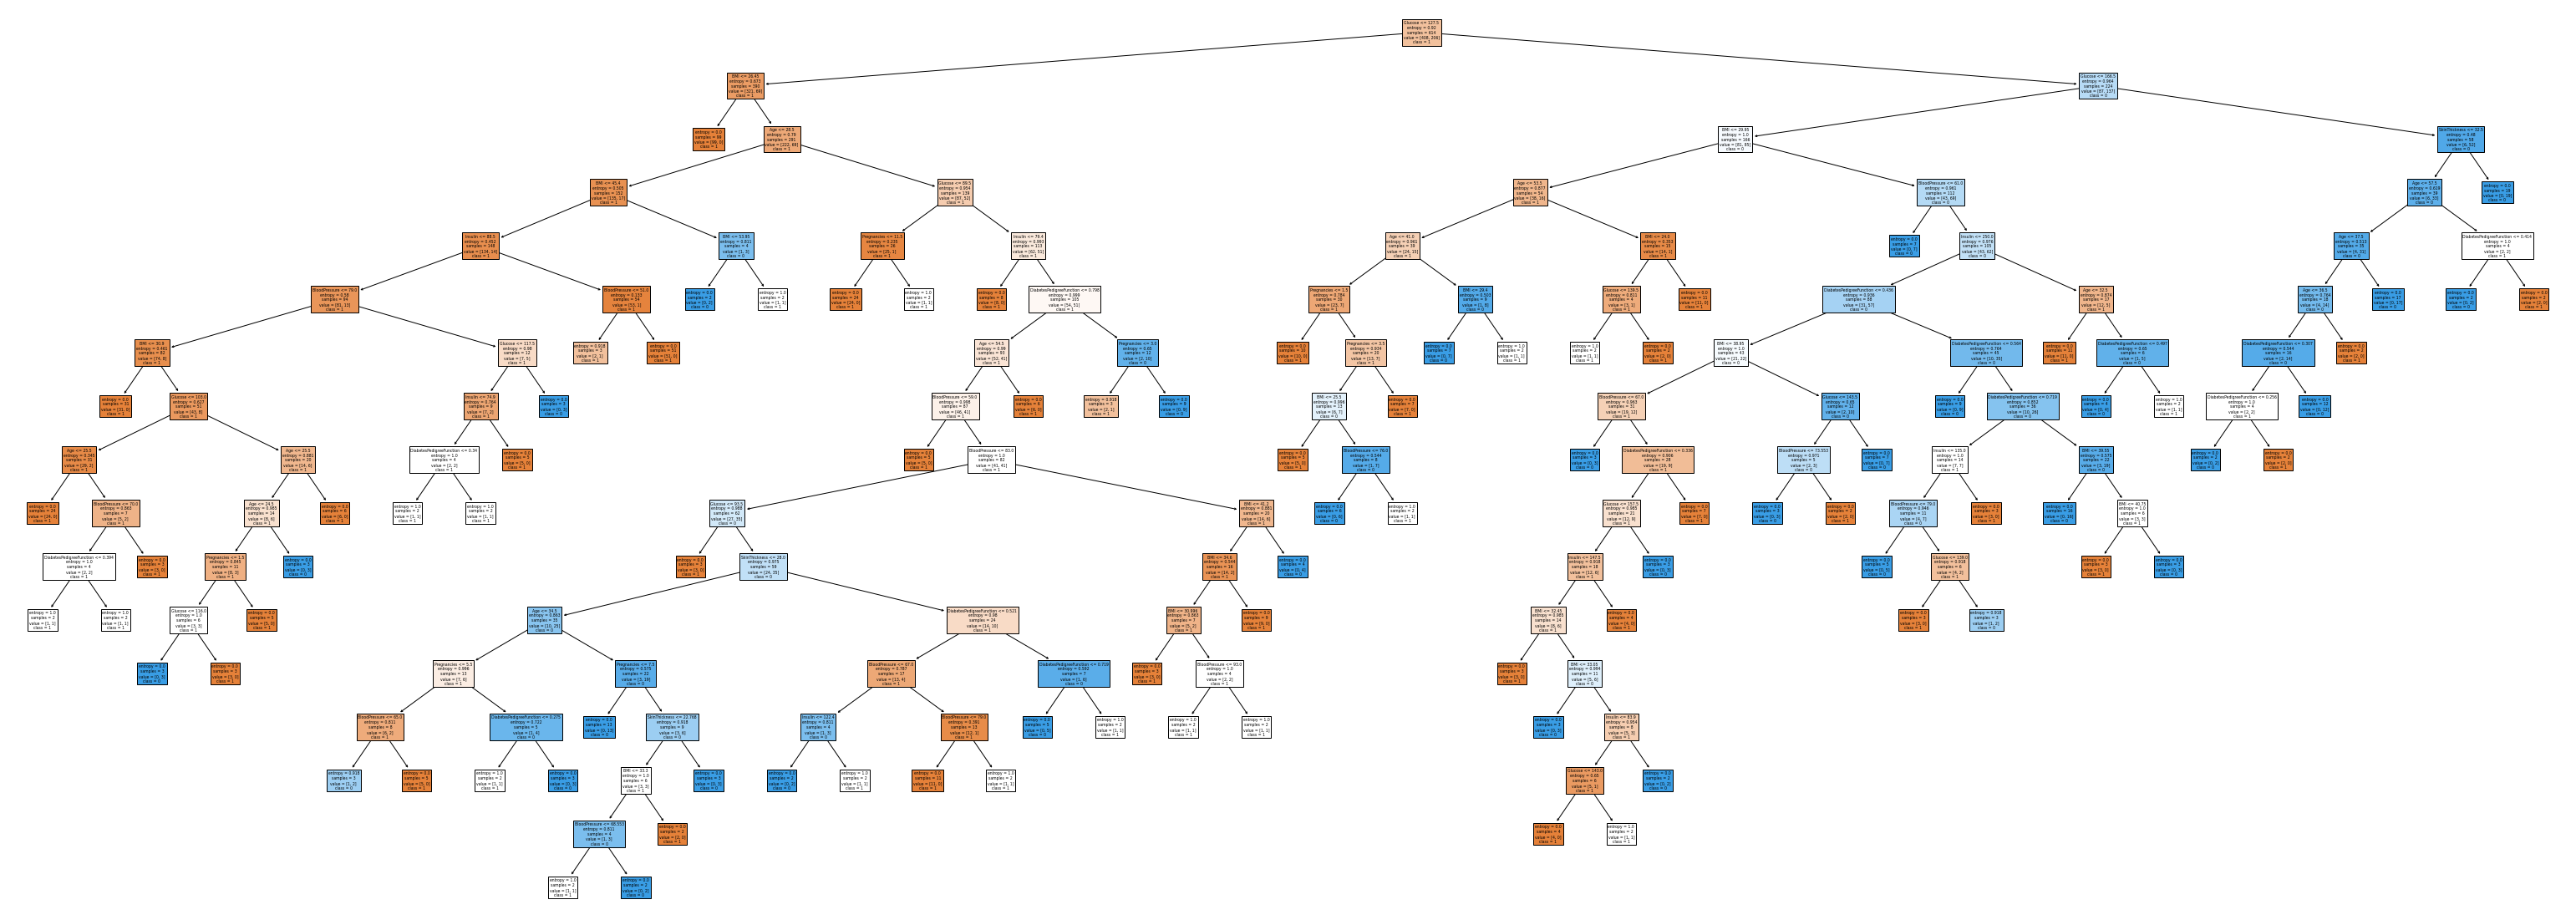

In [10]:
# plot decison tree
from sklearn import tree
fig = plt.figure(figsize = (55, 20))
fn = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
DT = tree.plot_tree(classifierDT,
                    feature_names = fn,  
                    class_names = y,
                    filled = True)


In [11]:
# identifica las características importantes
classifierDT.feature_importances_

array([0.05838219, 0.29781734, 0.104413  , 0.0187689 , 0.06158974,
       0.21452854, 0.09041467, 0.15408562])

La importancia de la característica calculará la disminución de la impureza del nodo ponderada por la probabilidad de alcanzar ese nodo. La probabilidad del nodo es el número de muestras que llegan al nodo, dividido por el número total de muestras. Los valores más altos indican una mayor importancia de las características en el modelo de predicción de DT.

## Perceptrones multicapa (red neuronal feedforward)
Para abordar el inconveniente del perceptrón único, se propusieron perceptrones multicapa, también conocidos comúnmente como redes neuronales de avance. Es una composición de múltiples perceptrones conectados de diferentes maneras y que operan en funciones de activación distintivas, para permitir un mecanismo de aprendizaje mejorado. La muestra de entrenamiento se propaga hacia adelante a través de la red y el error de salida se propaga hacia atrás; el error se minimiza utilizando un método de descenso de gradiente, que calculará una función de pérdida para todos los pesos en la red

## Parámetros clave para Scikit-learn MLP
Veamos los parámetros clave para ajustar el modelo MLP de Scikit-learn.

* **hidden_layer_sizes:** Debe proporcionar una cantidad de capas ocultas y neuronas para cada capa oculta. Por ejemplo, hidden_layer_sizes – (5,3,3) significa que hay tres capas ocultas y el número de neuronas para la capa uno es 5, para la capa dos es 3 y para la capa tres es 3, respectivamente. El valor predeterminado es (100), es decir, una capa oculta con 100 neuronas.
* **activation:** Esta es la función de activación de una capa oculta; hay cuatro funciones de activación disponibles para su uso; el valor predeterminado es "relu".
     * relu: La función de unidad lineal rectificada, devuelve $f(x) = max(0, x)$
     * logística: La función sigmoidea logística, devuelve f(x) = 1 / (1 + exp(-x)).
     * identidad: activación sin operación, útil para implementar un cuello de botella lineal, devuelve f(x) = x
     * tanh: La función tan hiperbólica, devuelve $f(x) = tanh(x)$.
* **solver:** Esto es para optimizar el peso. Hay tres opciones disponibles, la predeterminada es "adam".
     * adam: Optimizador basado en gradiente estocástico propuesto por Diederik Kingma y Jimmy Ba, que funciona bien para un gran conjunto de datos
     * lbfgs: Pertenece a la familia de métodos cuasi-Newton, funciona bien para conjuntos de datos pequeños
     * sgd: Descenso de gradiente estocástico
* **max_iter:** Este es el número máximo de iteraciones para que el solucionador converja, el valor predeterminado es 200.
* **learning_rate_init:** Esta es la tasa de aprendizaje inicial para controlar el tamaño de paso para actualizar los pesos (solo se aplica a los solucionadores sgd/ adam), el valor predeterminado es 0,001.

<center><img src="imagen/NEURONS-IN-NUERAL-NETWORK.gif" width="450" height="50"></center>

In [12]:
import sklearn.neural_network as nn

In [13]:
#let's train multi layer perceptron regressor
clasifiMLP = nn.MLPClassifier(hidden_layer_sizes = (128,),solver = 'adam', 
                        activation = 'relu', random_state=1, max_iter=500).fit(X_train, y_train)


In [14]:
clasifiMLP

MLPClassifier(hidden_layer_sizes=(128,), max_iter=500, random_state=1)

El modelado de datos ahora está completo.

# Model Evaluation

In [35]:
# número de registros en el conjunto de prueba
len(X_test)

154

In [36]:
# contar cada resultado en el conjunto de prueba
count = Counter(y_test)
print(count.items())

dict_items([('0', 92), ('1', 62)])


El rendimiento del modelo se evalúa y valida mediante el uso del conjunto de prueba de 154 registros para predecir las clasificaciones de estos nuevos datos no sesgados que no se utilizaron para entrenar el modelo. Luego, la matriz de confusión se usa para determinar las métricas de rendimiento de exactitud, precisión, recuperación y puntaje F1, según esas clasificaciones. Los apoyos son 92 instancias para la etiqueta de clase objetivo de 0 y 62 para 1. Este proceso garantiza que los modelos sean útiles al ser generalizables incluso cuando los datos de entrenamiento específicos utilizados se extienden para incluir nuevos datos de prueba, o en términos técnicos 'evitar más adecuado'.

In [15]:
# usar los tres modelos elegidos para hacer predicciones sobre datos de prueba
y_predKNN = classifierKNN.predict(X_test)
y_predDT = classifierDT.predict(X_test)
y_predNB = classifierNB.predict(X_test)
y_predMLP=clasifiMLP.predict(X_test)

In [16]:
# para el modelo k-vecinos más cercanos
# usando matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predKNN))
print(classification_report(y_test, y_predKNN))

# usando la métrica de rendimiento de precisión
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierKNN.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predKNN))

[[78 14]
 [31 31]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        92
           1       0.69      0.50      0.58        62

    accuracy                           0.71       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.70      0.71      0.70       154

Train Accuracy:  0.7866449511400652
Test Accuracy:  0.7077922077922078


In [17]:
# para el modelo Naive Bayes
# usando matriz de confusión
print(confusion_matrix(y_test, y_predNB))
print(classification_report(y_test, y_predNB))

# utilizando la métrica de rendimiento de precisión
print("Train Accuracy: ", accuracy_score(y_train, classifierNB.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predNB))

[[76 16]
 [23 39]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        92
           1       0.71      0.63      0.67        62

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.74      0.75      0.74       154

Train Accuracy:  0.749185667752443
Test Accuracy:  0.7467532467532467


In [18]:
# para el modelo de árbol de decisión
# usando matriz de confusión
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# usando la métrica de rendimiento de precisión
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[78 14]
 [21 41]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        92
           1       0.75      0.66      0.70        62

    accuracy                           0.77       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.77      0.77      0.77       154

Train Accuracy:  0.9641693811074918
Test Accuracy:  0.7727272727272727


Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        92
           1       0.65      0.27      0.39        62

    accuracy                           0.65       154
   macro avg       0.65      0.59      0.57       154
weighted avg       0.65      0.65      0.61       154



NameError: name 'sns' is not defined

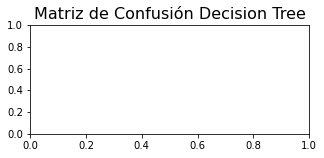

In [19]:
# Para el modelo de redes neural
# Usando para matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

print("Reporte de Clasificación")
print(classification_report(y_test, y_predMLP))

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Decision Tree", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_predMLP), annot = True, cmap = 'viridis',fmt = '.0f')
plt.show();

# Curva Roc
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clasifiMLP , X_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.title("Curva ROC")
plt.show()

# # usando la métrica de rendimiento de precisión
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, clasifiMLP.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predMLP))

In [ ]:
# data to plot
n_groups = 4
algorithms = ('k-Nearest Neighbour (KNN)', 'Decision Tree (DT)', 'Naive Bayes (NB)',"Red Neural(MLP)")
train_accuracy = (accuracy_score(y_train, classifierKNN.predict(X_train))*100, 
                  accuracy_score(y_train, classifierDT.predict(X_train))*100, 
                  accuracy_score(y_train, classifierNB.predict(X_train))*100,
                 accuracy_score(y_train, clasifiMLP.predict(X_train))*100)
test_accuracy = (accuracy_score(y_test, y_predKNN)*100, 
                 accuracy_score(y_test, y_predDT)*100, 
                 accuracy_score(y_test, y_predNB)*100,
                accuracy_score(y_test, y_predMLP)*100)

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparación de Algoritmos  Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

El modelo NB tiene métricas de rendimiento general de 74,92% de precisión, 74% de precisión y puntuación F1 y 75% de recuperación. El modelo KNN logró  resultados con 78,66% de precisión, 70% de precisión y recuperación y 69% de puntuación F1. Por otro lado, las métricas de rendimiento general del modelo DT son las mejores, con un 78,57% de precisión, un 78% de precisión y puntuación F1 y un 79% de recuperación. Para los tres modelos elegidos, el resultado de diabetes mejor clasificado es 0.

A continuación, también debe tenerse en cuenta el grado de sobreajuste antes de elegir el mejor modelo. Sin tener en cuenta KNN debido a sus métricas de rendimiento general comparativamente pobres, el modelo NB solo tiene una pequeña diferencia entre la precisión del tren y la prueba y, por lo tanto, no hay sobreajuste, y la precisión del tren del 74.68% indica que las reglas aprendidas no son específicas para el conjunto de trenes y se generalizarán. mucho más allá del tren establecido para el equipo de prueba. Debido a esto, NB se elige como el mejor modelo final sobre DT, ya que DT sobreajusta los datos con una gran diferencia entre la precisión del tren y la prueba.

La precisión indica la proporción general de predicciones correctas para las tres clases. La precisión del tren se mide en función de los ejemplos sobre los que se construyó el modelo, mientras que la precisión de la prueba se basa en los que aún no se han visto. NB logró el 74,68% tanto para la precisión del tren como para la precisión de la prueba.

Sin embargo, será engañoso basar las decisiones únicamente en esto, ya que el conjunto de datos utilizado es relativamente pequeño y está sesgado. Por lo tanto, las métricas de precisión y recuperación también se consideran para medir el rendimiento del modelo.

Recall indica la proporción de predicciones correctas para cada clase individual, fuera de la clase real correspondiente. En otras palabras, la proporción de todas las clases reales que se predijeron correctamente. Se encontró que NB predijo correctamente el 75% de todas las clases reales.

La precisión indica la proporción de predicciones correctas para cada clase individual, fuera de la clase predicha correspondiente. En otras palabras, la proporción de todas las clases predichas en realidad se predijo correctamente. Se encontró que el 74% de todas las clases predichas fueron realmente predichas correctamente por NB.

Sin embargo, el recuerdo y la precisión tienen una relación inversa. Para hacerlos comparables para los casos en los que ambos son importantes, se introduce la puntuación F1. La puntuación F1, también conocida como puntuación F o medida F, se utiliza para hacer que la precisión y el recuerdo sean comparables en los casos en que ambos son importantes, midiendo su media armónica. Esto le permite considerar ambas métricas y castigar los valores extremos con más fuerza. La puntuación F es más útil para conjuntos de datos sesgados que son comunes en escenarios de la vida real, así como en este estudio de caso. Esto ocurre cuando los recuentos de, en este caso FP de 20 y FN de 13, son muy diferentes, pero aún deben considerarse adecuadamente ya que son condiciones cruciales en la predicción. Tanto el falso negativo (FN) como el falso positivo (FP) son el peor error en la predicción de la diabetes, ya que las implicaciones de una clasificación incorrecta para un FN para un paciente diagnosticado erróneamente como sin diabetes es que el paciente pierde el tratamiento y los medicamentos inmediatos. y puede conducir a la muerte si el error se descubre demasiado tarde. Por otro lado, una PF para un paciente diagnosticado erróneamente con diabetes hará que el paciente sea sometido a tratamientos y medicamentos innecesarios que pueden conducir a otros problemas de salud. Por lo tanto, F-score calculará la calidad general de las traducciones producidas por el motor de aprendizaje automático elegido, que es del 74% según el modelo NB.

La matriz de confusión tabula la clase predicha verticalmente y la clase real horizontalmente.

En conclusión, se elige el modelo NB como modelo final para la predicción del resultado de la diabetes.

# Model Interpretation

El último paso crucial de un proyecto de ciencia de datos es la interpretación de los modelos y los datos, en términos de su poder predictivo y, por lo tanto, su capacidad para generalizar datos futuros invisibles.

El modelo NB ahora está listo para implementarse para predecir nuevas instancias de valor. Para ello, se crea un marco de datos para describir las características de varios factores de la diabetes. Los valores máximo y mínimo de cada característica se consideran antes de crear el marco de datos, a fin de garantizar que todos los valores sean confiables y aceptables.

In [32]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Un ejemplo similar se muestra a continuación, usando 'Embarazos' de 1, 'Glucosa' de 50 mg / dL, 'Presión sanguínea' de 80 mm Hg, 'Espesor de la piel' de 33 mm, 'Insulina' de 70 mu U / ml, 'IMC 'de 30 kg / m ^ 2,' DiabetesPedigreeFunction 'de 0,55 y' Edad 'de 20 años. Estas nuevas instancias de datos se pasarán al clasificador del modelo NB para predecir su etiqueta de clase de resultado de diabetes.

In [22]:
# new data
newdata = [[1, 50, 80, 33, 70, 30, 0.55, 20]]

# calcular las probabilidades de asignar a cada una de las dos clases de resultado
probaNB = classifierNB.predict_proba(newdata)
#probaDT=classifierDT.predict_proba(newdata)
probaNB.round(4) # redondear probabilidades a cuatro lugares decimales, si corresponde

array([[0.9892, 0.0108]])

In [23]:
# hacer predicción de etiqueta de clase
predDT = classifierNB.predict(newdata)
predDT

array(['0'], dtype='<U1')

La clase pronosticada para el ejemplo especificado se asigna como 0, ya que su probabilidad del 98,92% es casi igual a una certeza del 100% y mucho más alta que la de la clase 1 de resultado de diabetes. También es seguro interpretar que este resultado tiene un 74,68% de precisión, un 74% de precisión y puntuación F1 y un 75% de recuperación, según las métricas de rendimiento del modelo NB.

Las posibles mejoras pueden incluir otros fuertes predictores del resultado de la diabetes fuera de los 8 mencionados anteriormente, como el peso y la sequedad de la piel. La presencia de estos síntomas puede ser muy relevante y, por tanto, útil de incluir en el diseño del modelo.